In [51]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd

In [54]:
df=pd.read_csv("inventory_data_noisy.csv")

In [55]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [56]:
missing_values=df.isnull().sum()
print("Missing values count: \n", missing_values)

Missing values count: 
 Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64


In [57]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows.head()) 

    Dealer_ID Product_ID        Date  Quantity  Consumption Location
247      D000       P002  2022-03-08     990.0        190.0      NaN
251      D000       P002  2022-03-12       NaN          NaN      NaN
273      D000       P003  2022-01-04     990.0        190.0      NaN
290      D000       P003  2022-01-21       NaN          NaN      NaN
326      D000       P003  2022-02-27     990.0        190.0      NaN


In [58]:
print(df[df["Location"].isnull()]["Dealer_ID"].value_counts())
print(df[["Quantity", "Consumption"]].describe())


Dealer_ID
D001    27
D007    23
D006    20
D002    20
D004    20
D009    18
D000    16
D008    16
D005    15
D003     9
Name: count, dtype: int64
           Quantity   Consumption
count  18268.000000  18268.000000
mean      59.105704     12.938526
std       71.085667     13.313527
min       10.000000      5.000000
25%       32.000000      8.000000
50%       54.000000     12.000000
75%       77.000000     16.000000
max      990.000000    190.000000


In [59]:
df["Location"] = df.groupby("Dealer_ID")["Location"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [60]:
import numpy as np

Q1 = df[["Quantity", "Consumption"]].quantile(0.25)
Q3 = df[["Quantity", "Consumption"]].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df["Quantity"] < (Q1["Quantity"] - 1.5 * IQR["Quantity"])) | 
               (df["Quantity"] > (Q3["Quantity"] + 1.5 * IQR["Quantity"]))) |
              ((df["Consumption"] < (Q1["Consumption"] - 1.5 * IQR["Consumption"])) | 
               (df["Consumption"] > (Q3["Consumption"] + 1.5 * IQR["Consumption"])))]

print(outliers)


      Dealer_ID Product_ID        Date  Quantity  Consumption     Location
247        D000       P002  2022-03-08     990.0        190.0  Los Angeles
273        D000       P003  2022-01-04     990.0        190.0  Los Angeles
326        D000       P003  2022-02-27     990.0        190.0  Los Angeles
820        D000       P009  2022-01-11     990.0        190.0  Los Angeles
1397       D000       P015  2022-02-18     990.0        190.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
16803      D009       P006  2022-03-04     990.0        190.0  Los Angeles
16973      D009       P008  2022-02-24     990.0        190.0  Los Angeles
17437      D009       P013  2022-03-08     990.0        190.0  Los Angeles
17777      D009       P017  2022-02-18     990.0        190.0  Los Angeles
17788      D009       P017  2022-02-29     990.0        190.0  Los Angeles

[92 rows x 6 columns]


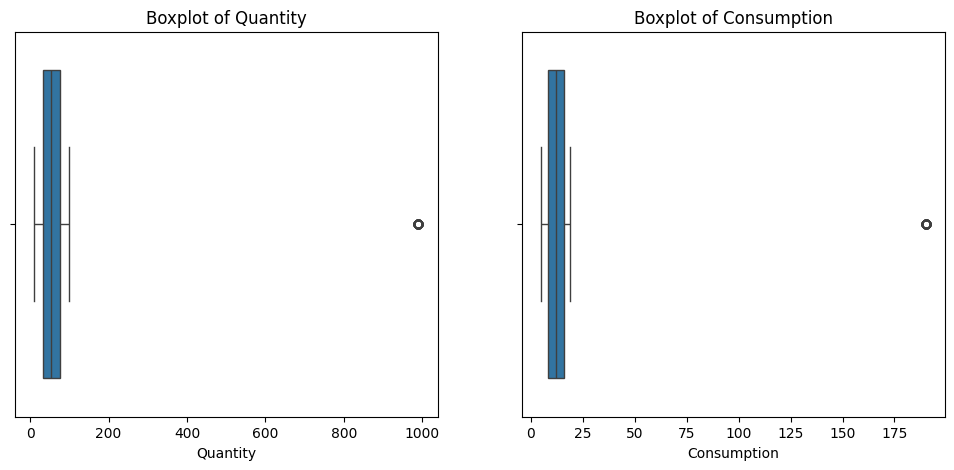

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Quantity"])
plt.title("Boxplot of Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Consumption"])
plt.title("Boxplot of Consumption")

plt.show()


In [62]:
Q1 = df[["Quantity", "Consumption"]].quantile(0.25)
Q3 = df[["Quantity", "Consumption"]].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find all outliers
outliers = df[
    (df["Quantity"] < lower_bound["Quantity"]) | (df["Quantity"] > upper_bound["Quantity"]) |
    (df["Consumption"] < lower_bound["Consumption"]) | (df["Consumption"] > upper_bound["Consumption"])
]

print(outliers)


      Dealer_ID Product_ID        Date  Quantity  Consumption     Location
247        D000       P002  2022-03-08     990.0        190.0  Los Angeles
273        D000       P003  2022-01-04     990.0        190.0  Los Angeles
326        D000       P003  2022-02-27     990.0        190.0  Los Angeles
820        D000       P009  2022-01-11     990.0        190.0  Los Angeles
1397       D000       P015  2022-02-18     990.0        190.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
16803      D009       P006  2022-03-04     990.0        190.0  Los Angeles
16973      D009       P008  2022-02-24     990.0        190.0  Los Angeles
17437      D009       P013  2022-03-08     990.0        190.0  Los Angeles
17777      D009       P017  2022-02-18     990.0        190.0  Los Angeles
17788      D009       P017  2022-02-29     990.0        190.0  Los Angeles

[92 rows x 6 columns]


In [63]:
df = df[~((df["Quantity"] == 990) & (df["Consumption"] == 190))]


In [64]:
print(df[(df["Quantity"] == 990) & (df["Consumption"] == 190)])


Empty DataFrame
Columns: [Dealer_ID, Product_ID, Date, Quantity, Consumption, Location]
Index: []


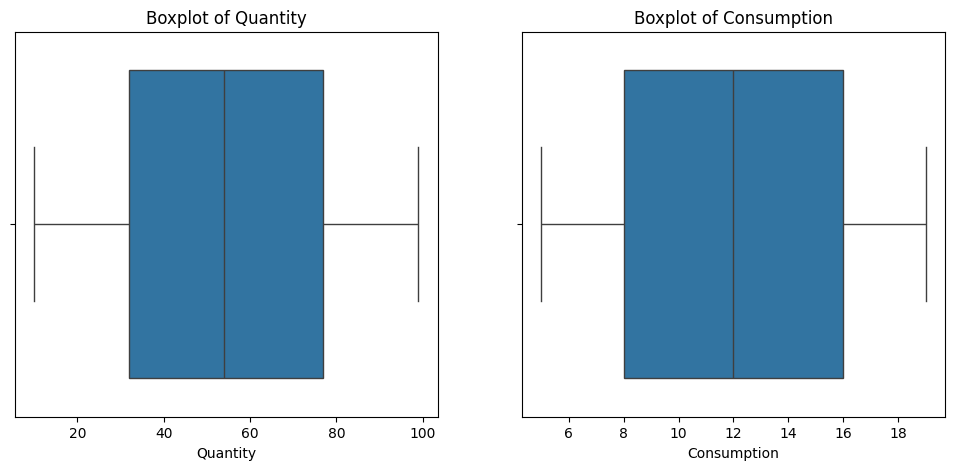

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Quantity"])
plt.title("Boxplot of Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Consumption"])
plt.title("Boxplot of Consumption")

plt.show()


In [66]:
print(df.isnull().sum())


Dealer_ID       0
Product_ID      0
Date            0
Quantity       92
Consumption    92
Location        0
dtype: int64


In [67]:
print("Skewness of Quantity:", df["Quantity"].skew())
print("Skewness of Consumption:", df["Consumption"].skew())


Skewness of Quantity: 0.009894399755943521
Skewness of Consumption: -0.004773502481313251


In [68]:
df["Quantity"].fillna(df["Quantity"].mean(), inplace=True)
df["Consumption"].fillna(df["Consumption"].mean(), inplace=True)


C:\Users\CVR\AppData\Local\Temp\ipykernel_12856\2435807885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity"].fillna(df["Quantity"].mean(), inplace=True)
C:\Users\CVR\AppData\Local\Temp\ipykernel_12856\2435807885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quantity"].fillna(df["Quantity"].mean(), inplace=True)
C:\Us

In [69]:
df.loc[:, "Quantity"] = df["Quantity"].fillna(df["Quantity"].mean())
df.loc[:, "Consumption"] = df["Consumption"].fillna(df["Consumption"].mean())


In [70]:
print(df.isnull().sum())


Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64


In [71]:
Q1 = df[["Quantity", "Consumption"]].quantile(0.25)
Q3 = df[["Quantity", "Consumption"]].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["Quantity"] < lower_bound["Quantity"]) | (df["Quantity"] > upper_bound["Quantity"]) |
    (df["Consumption"] < lower_bound["Consumption"]) | (df["Consumption"] > upper_bound["Consumption"])
]

print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 0


In [72]:
print(df.dtypes)



Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object


In [73]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')



C:\Users\CVR\AppData\Local\Temp\ipykernel_12856\1575057885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [74]:
df.loc[:, "Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [75]:
df.dtypes


Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity              float64
Consumption           float64
Location               object
dtype: object

In [76]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 349


In [77]:
df = df.drop_duplicates()
print("Duplicates removed! Total rows left:", len(df))


Duplicates removed! Total rows left: 17919


In [78]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,NaT,54.393871,12.042309,Chicago
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago


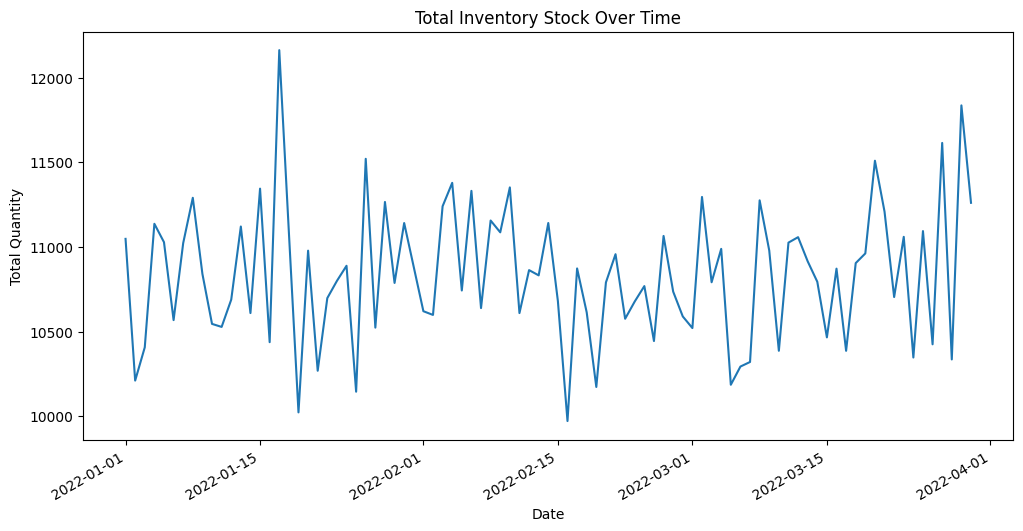

In [79]:
import matplotlib.pyplot as plt

df.groupby("Date")["Quantity"].sum().plot(figsize=(12, 6), title="Total Inventory Stock Over Time", ylabel="Total Quantity", xlabel="Date")
plt.show()


In [80]:
 correlation = df["Quantity"].corr(df["Consumption"])
print("Correlation between Quantity and Consumption:", correlation)


Correlation between Quantity and Consumption: 0.0022594125285274914


In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Dealer_ID"] = label_encoder.fit_transform(df["Dealer_ID"])
df["Product_ID"] = label_encoder.fit_transform(df["Product_ID"])
df["Location"] = label_encoder.fit_transform(df["Location"])

print(df.head())  # Check how categories got converted to numbers


   Dealer_ID  Product_ID       Date  Quantity  Consumption  Location
0          0           0 2022-01-01      62.0          8.0         0
1          0           0 2022-01-02      70.0          9.0         0
2          0           0 2022-01-03      12.0         17.0         1
3          0           0 2022-01-04      74.0         13.0         1
4          0           0 2022-01-05      57.0         10.0         1


In [83]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,0,0,2022-01-01,62.000000,8.000000,0
1,0,0,2022-01-02,70.000000,9.000000,0
2,0,0,2022-01-03,12.000000,17.000000,1
3,0,0,2022-01-04,74.000000,13.000000,1
4,0,0,2022-01-05,57.000000,10.000000,1
...,...,...,...,...,...,...
18253,8,13,NaT,54.393871,12.042309,0
18264,1,10,2022-01-27,26.000000,18.000000,0
18328,1,14,2022-01-14,30.000000,5.000000,0
18337,1,13,2022-01-26,48.000000,15.000000,0


In [84]:
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.weekday  # 0 = Monday, 6 = Sunday


In [85]:
df["Stock_Change"] = df["Quantity"].diff()  # Change in stock over time
df["Consumption_Change"] = df["Consumption"].diff()  # Change in usage over time


In [86]:
df["Supply_Demand_Ratio"] = df["Quantity"] / (df["Consumption"] + 1)  # +1 to avoid division by zero


In [87]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Month,Weekday,Stock_Change,Consumption_Change,Supply_Demand_Ratio
0,0,0,2022-01-01,62.000000,8.000000,0,1.0,5.0,NaN,NaN,6.888889
1,0,0,2022-01-02,70.000000,9.000000,0,1.0,6.0,8.000000,1.000000,7.000000
2,0,0,2022-01-03,12.000000,17.000000,1,1.0,0.0,-58.000000,8.000000,0.666667
3,0,0,2022-01-04,74.000000,13.000000,1,1.0,1.0,62.000000,-4.000000,5.285714
4,0,0,2022-01-05,57.000000,10.000000,1,1.0,2.0,-17.000000,-3.000000,5.181818
...,...,...,...,...,...,...,...,...,...,...,...
18253,8,13,NaT,54.393871,12.042309,0,NaN,NaN,-42.606129,-2.957691,4.170571
18264,1,10,2022-01-27,26.000000,18.000000,0,1.0,3.0,-28.393871,5.957691,1.368421
18328,1,14,2022-01-14,30.000000,5.000000,0,1.0,4.0,4.000000,-13.000000,5.000000
18337,1,13,2022-01-26,48.000000,15.000000,0,1.0,2.0,18.000000,10.000000,3.000000


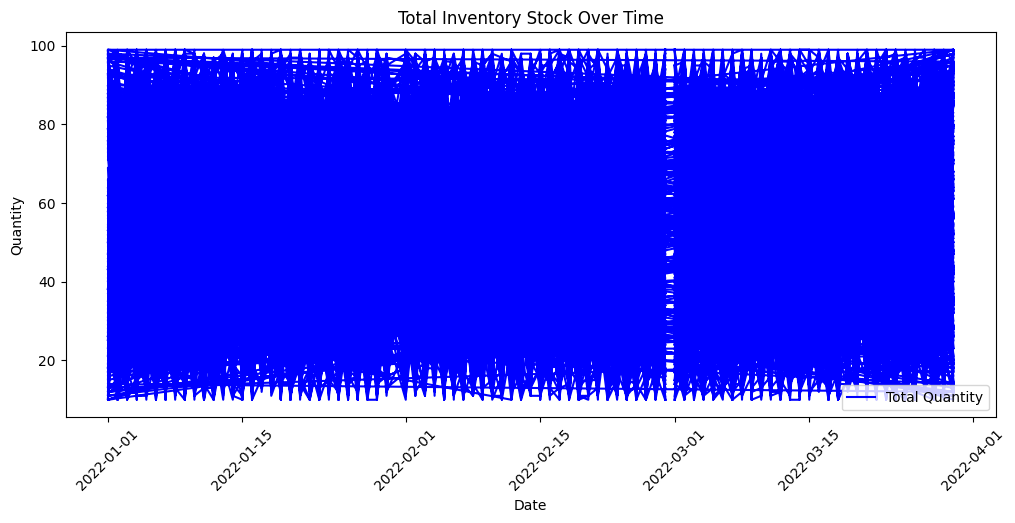

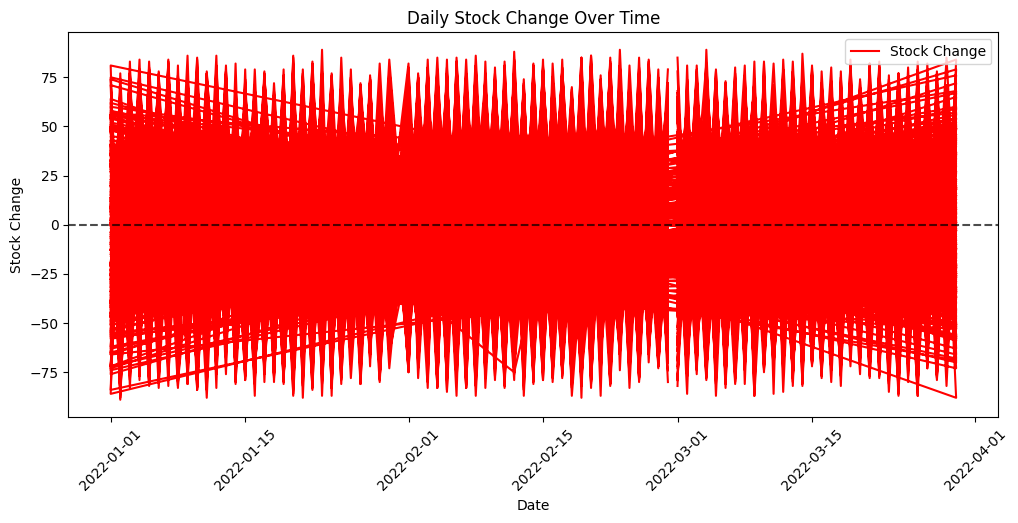

In [88]:
import matplotlib.pyplot as plt

# Plot total inventory over time
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Quantity"], label="Total Quantity", color="b")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Total Inventory Stock Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot stock change over time
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Stock_Change"], label="Stock Change", color="r")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Reference line at 0
plt.xlabel("Date")
plt.ylabel("Stock Change")
plt.title("Daily Stock Change Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


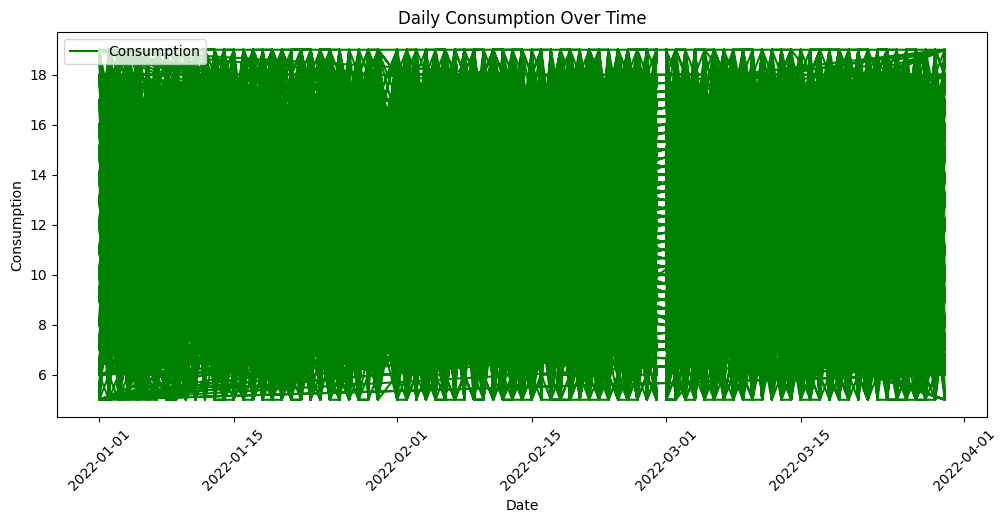

In [89]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Consumption"], label="Consumption", color="g")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("Daily Consumption Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


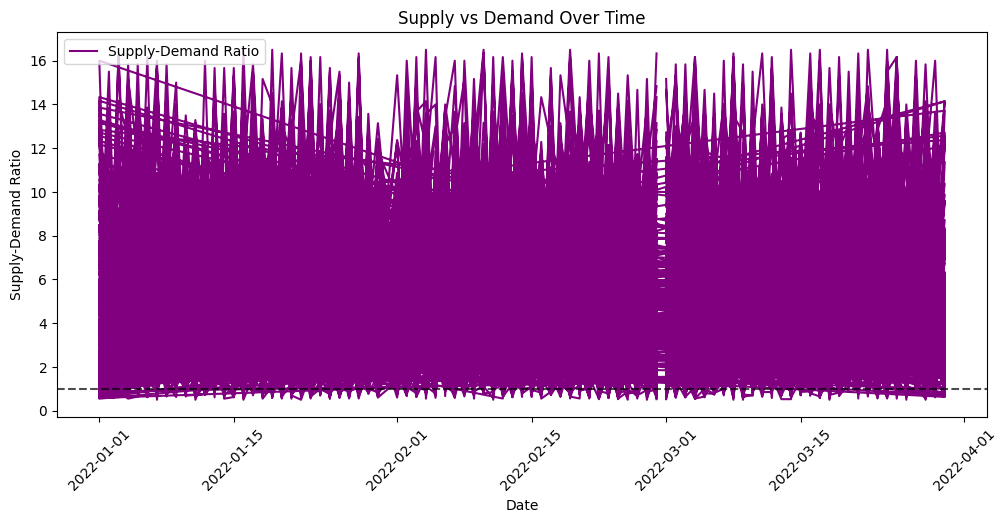

In [90]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Supply_Demand_Ratio"], label="Supply-Demand Ratio", color="purple")
plt.axhline(1, color='black', linestyle='--', alpha=0.7)  # Reference line at ratio = 1
plt.xlabel("Date")
plt.ylabel("Supply-Demand Ratio")
plt.title("Supply vs Demand Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


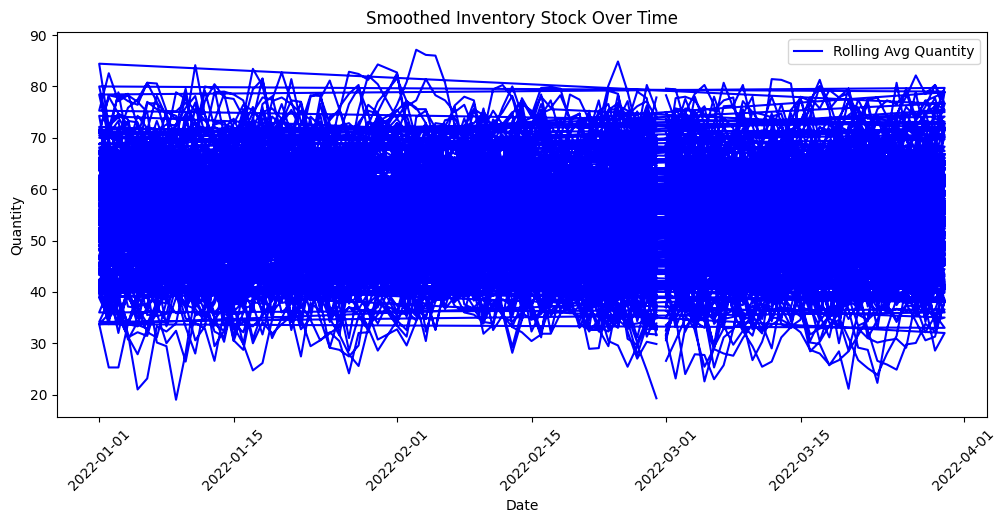

In [91]:
df["Rolling_Quantity"] = df["Quantity"].rolling(window=7).mean()  # 7-day moving average
df["Rolling_Consumption"] = df["Consumption"].rolling(window=7).mean()
df["Rolling_Supply_Demand"] = df["Supply_Demand_Ratio"].rolling(window=7).mean()
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Rolling_Quantity"], label="Rolling Avg Quantity", color="b")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Smoothed Inventory Stock Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


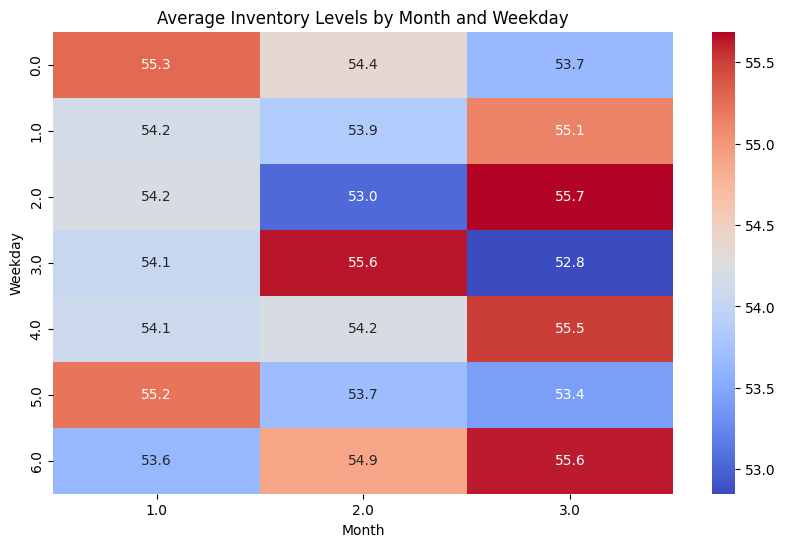

In [92]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Pivot table for heatmap
heatmap_data = df.pivot_table(index="Weekday", columns="Month", values="Quantity", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Average Inventory Levels by Month and Weekday")
plt.show()


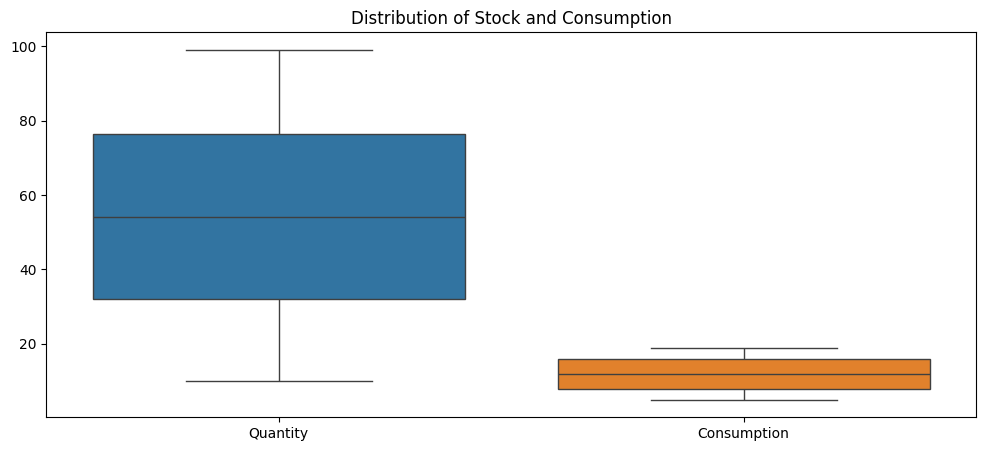

In [93]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["Quantity", "Consumption"]])
plt.title("Distribution of Stock and Consumption")
plt.show()


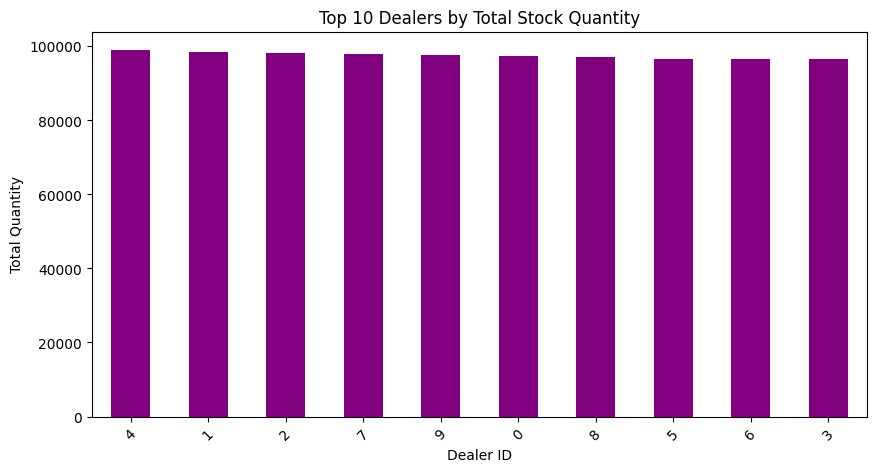

In [94]:
top_dealers = df.groupby("Dealer_ID")["Quantity"].sum().nlargest(10)  # Top 10 dealers

plt.figure(figsize=(10, 5))
top_dealers.plot(kind="bar", color="purple")
plt.title("Top 10 Dealers by Total Stock Quantity")
plt.xlabel("Dealer ID")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


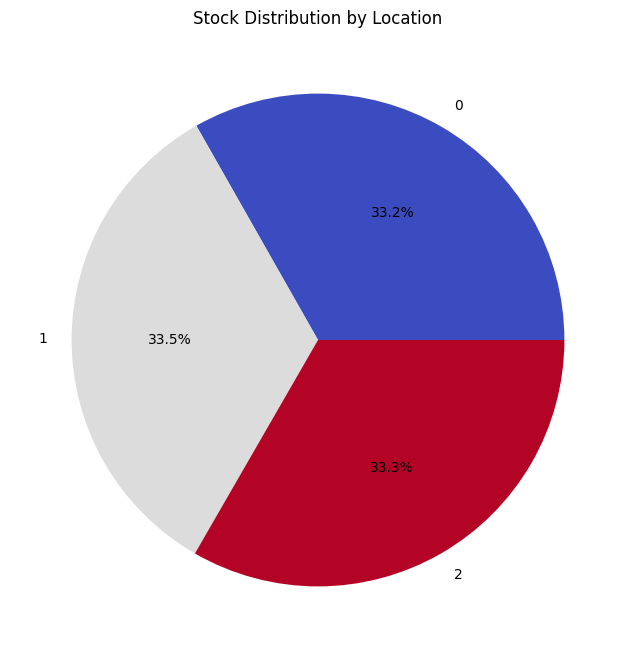

In [95]:
location_stock = df.groupby("Location")["Quantity"].sum()

plt.figure(figsize=(8, 8))
location_stock.plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm")
plt.title("Stock Distribution by Location")
plt.ylabel("")  # Hide y-label for clarity
plt.show()



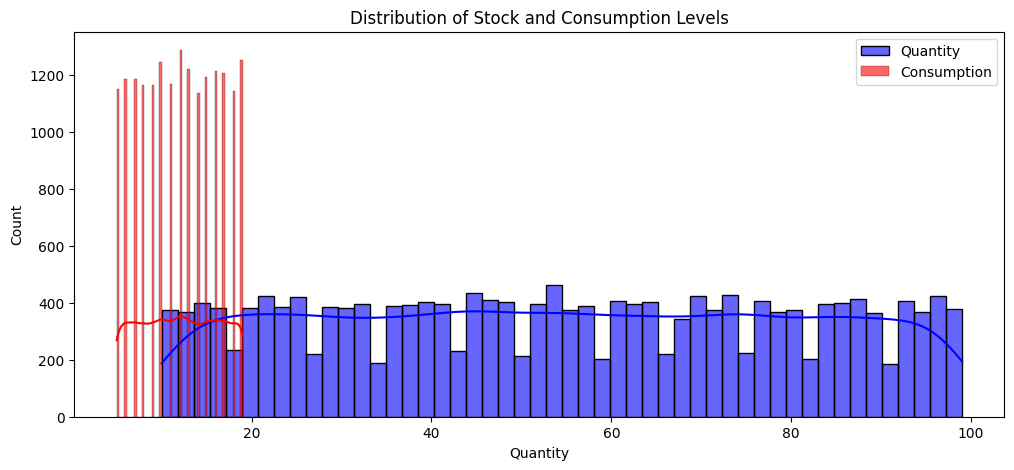

In [96]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Quantity"], bins=50, kde=True, color="blue", label="Quantity", alpha=0.6)
sns.histplot(df["Consumption"], bins=50, kde=True, color="red", label="Consumption", alpha=0.6)
plt.legend()
plt.title("Distribution of Stock and Consumption Levels")
plt.show()


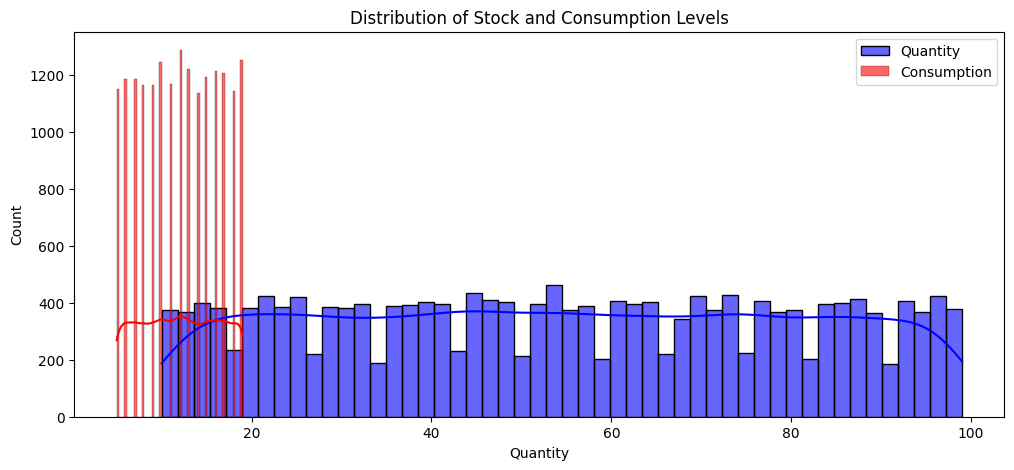

In [97]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Quantity"], bins=50, kde=True, color="blue", label="Quantity", alpha=0.6)
sns.histplot(df["Consumption"], bins=50, kde=True, color="red", label="Consumption", alpha=0.6)
plt.legend()
plt.title("Distribution of Stock and Consumption Levels")
plt.show()
